# **Project-Predictive Modelling**

## Problem -1

My job at the company Gem Stones Co ltd,.(Sells Cubic Zicronia, aka crystalline form of Zirconium dioxide) is to predict the prices of the Cubic zirconia depending on it's several attributes. I need to figure out the important attributes of the gems and distinguish the gems between higher profitable and lower profitables to have better profit share.

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

### Importing the Libraries

In [1]:
# For loading and Transformations on the dataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For simple math calculations and statistcal summary
from scipy import stats
import math
%matplotlib inline

#For actual model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# For Evaluation and interpretation of the model output 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

### Loading the dataset

In [2]:
df = pd.read_csv('cubic_zirconia.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


It is evident that the dataset is loaded properly from the head of the data. The first Column is just a serial number, hence it is not necessary to keep in the dataset. Price is the dependent variable and all the other are independent variables. The Columns Carat,Depth, X, Y, Z seems to be float values. To confirm, lets check the dtypes and other info of this dataset.

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


The columns Cut, Color and depth are categorical variables and are ordinal variables. Lets check the unique values of these columns.

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].unique())
        print('\n')

CUT :  ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


COLOR :  ['E' 'G' 'F' 'D' 'H' 'J' 'I']


CLARITY :  ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']




These columns can be converted categorical codes.

In [7]:
color = {'J': 0,'I': 1,'H': 2,'G': 3,"F": 4,'E': 5,'D': 6}
cut = {'Fair': 0,'Good': 1,'Very Good': 2,'Premium': 3,"Ideal": 4}
clarity = {'SI1': 2, 'IF': 7, 'VVS2': 5, 'VS1': 4, 'VVS1': 7, 'VS2': 3, 'SI2': 1, 'I1': 0}


df.cut = [cut[item] for item in df.cut] 
df.color = [color[item] for item in df.color] 
df.clarity = [clarity[item] for item in df.clarity] 

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,7,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df['cut'].unique()



array([4, 3, 2, 1, 0], dtype=int64)

In [10]:
df['color'].unique()

array([5, 3, 4, 6, 2, 0, 1], dtype=int64)

In [11]:
df['clarity'].unique()

array([2, 7, 5, 4, 3, 1, 0], dtype=int64)

In [12]:
pd.crosstab(df['color'], df['cut'])


cut,0,1,2,3,4
color,,,,,
0,68,161,354,407,453
1,94,253,640,711,1073
2,150,352,887,1161,1552
3,147,419,1154,1471,2470
4,148,454,1067,1167,1893
5,100,491,1186,1174,1966
6,74,311,742,808,1409


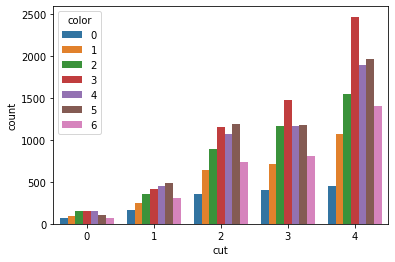

In [13]:
sns.countplot(x='cut',hue='color',data=df)

In [14]:
pd.crosstab(df['color'], df['clarity'])


clarity,0,1,2,3,4,5,7
color,,,,,,,
0,21,258,386,374,274,66,64
1,48,469,725,603,480,194,252
2,82,796,1082,804,595,306,437
3,68,779,1001,1205,1078,681,849
4,67,753,1088,1107,672,499,543
5,54,849,1249,1202,625,509,429
6,25,671,1040,804,369,276,159


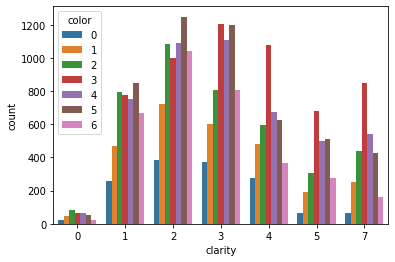

In [15]:
sns.countplot(x='clarity',hue='color',data=df)

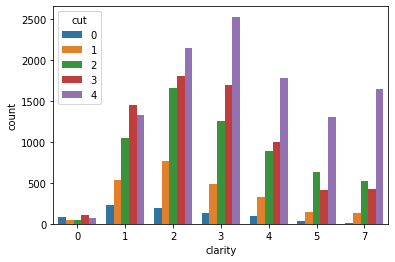

In [16]:
sns.countplot(x='clarity',hue='cut',data=df)

In [17]:
pd.crosstab(df['cut'], df['clarity'])

clarity,0,1,2,3,4,5,7
cut,,,,,,,
0,89,225,193,129,93,38,14
1,51,530,765,491,331,143,130
2,43,1047,1654,1254,887,627,518
3,108,1449,1809,1697,998,416,422
4,74,1324,2150,2528,1784,1307,1649


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null int64
color      26967 non-null int64
clarity    26967 non-null int64
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(4)
memory usage: 2.1 MB


### Checking for duplicates

In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' %(dups.sum()))

Number of duplicate rows = 34


In [20]:
print('Before removing duplicates the shape of data is ',df.shape)
df.drop_duplicates(inplace = True)
print('After removing duplicates the shape of data is ', df.shape)

Before removing duplicates the shape of data is  (26967, 10)
After removing duplicates the shape of data is  (26933, 10)


## Checking for Null values

In [21]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [22]:
df['depth'].fillna(df.depth.mean(), inplace = True)  
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are a significant number of variables missing from the the column depth.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
cut,26933.0,2.909702,1.113165,0.0,2.00,3.00,4.00,4.00
color,26933.0,3.394794,1.705883,0.0,2.00,3.00,5.00,6.00
clarity,26933.0,3.121858,1.782634,0.0,2.00,3.00,4.00,7.00
depth,26933.0,61.745285,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


1. The company has a maximum of 4.5 carat and minimum of 0.2 carat gems. The price range of the gems is from 326 to 18818 with average price offered being 3937.
2. When compared the means with other variables 'depth' 'table' & 'price' have quite odd values. We can scale the data to improve the accuracy of the model.
3. Min values of 'Cut', 'color', 'clarity' are zeros which are significant as they show lowest quality in the respective attributes.
4. Min values of 'x' 'y' 'z' indicated the presence of zeros in the data which can be replaced by nan and removed if their count is insignificant

In [24]:
df['x'] = df['x'].replace({0: np.nan})
df['y'] = df['y'].replace({0: np.nan})
df['z'] = df['z'].replace({0: np.nan})
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [25]:
df.dropna(inplace = True)


In [26]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
print("The unique value counts of 'cut' are \n",df['cut'].value_counts())

The unique value counts of 'cut' are 
 4    10805
3     6880
2     6027
1     2434
0      779
Name: cut, dtype: int64


In [28]:
print("The unique value counts of 'color' are \n",df['color'].value_counts())

The unique value counts of 'color' are 
 3    5650
5    4916
4    4722
2    4091
6    3341
1    2765
0    1440
Name: color, dtype: int64


In [29]:
print("The unique value counts of 'clarity' are \n",df['clarity'].value_counts(ascending = False))

The unique value counts of 'clarity' are 
 2    6564
3    6092
1    4561
4    4086
7    2730
5    2530
0     362
Name: clarity, dtype: int64


This shows that the gems of "Ideal" cut, "G" color and "SI1" clarity are majority in number and gems of "Fair" cut, "J" color and "I1" clarity are minority in number which shows that the Company believes in supplying Quality products.

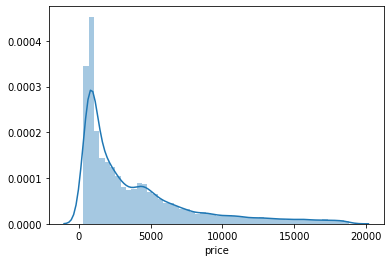

In [30]:
sns.distplot(df['price'])

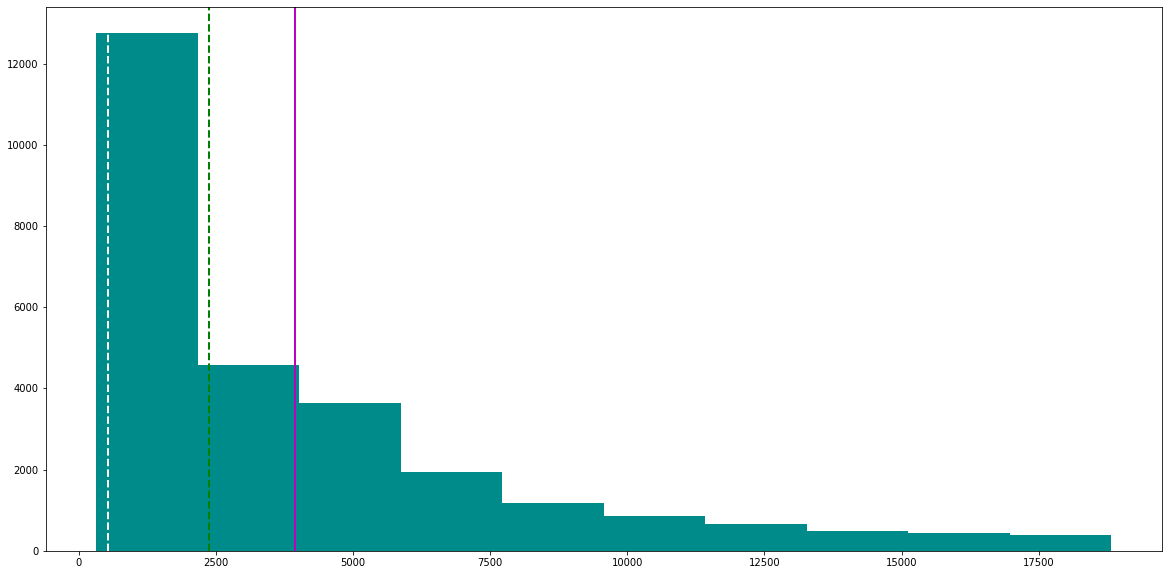

In [31]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(df['price'], color='darkcyan') # plots a simple histogram
plt.axvline(df['price'].mean(), color='m', linewidth=2)
plt.axvline(df['price'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['price'].mode()[0], color='w', linestyle='dashed', linewidth=2)

In [32]:
print('The mean price of the Cubic Zirconia gems are is', df['price'].mean())
print('Median of the Price distribution is', df['price'].median())


The mean price of the Cubic Zirconia gems are is 3936.249990714949
Median of the Price distribution is 2373.0


The price of the Cubic Zirconia follows a right skewed distribution with its mean around 4000 and Median at 2375

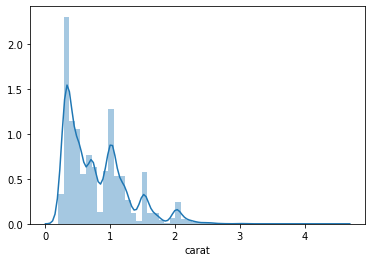

In [33]:
sns.distplot(df['carat'])

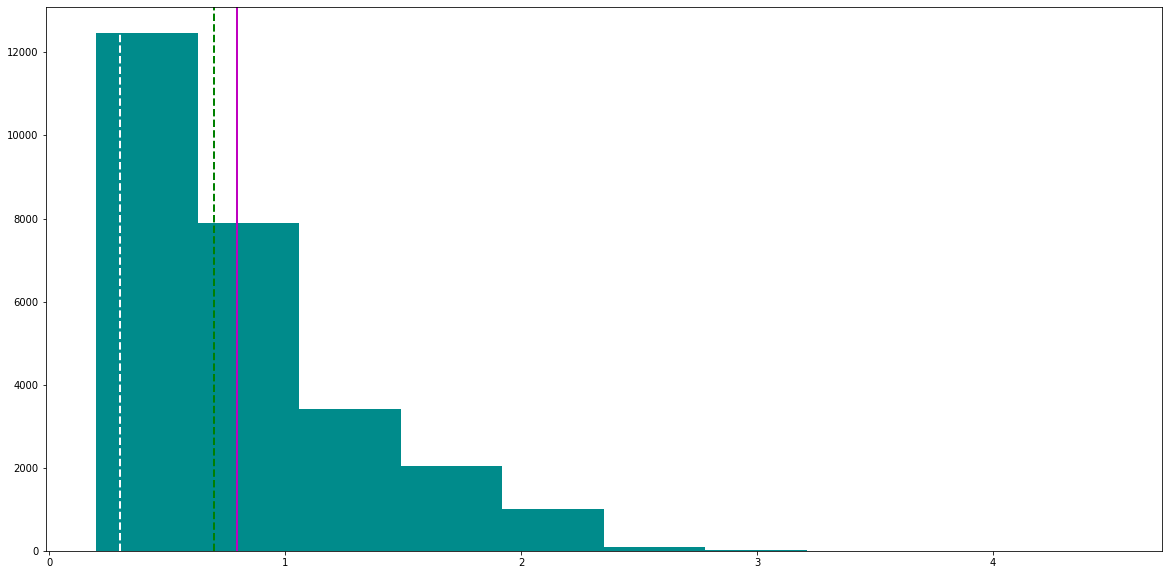

In [34]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(df['carat'], color='darkcyan') # plots a simple histogram
plt.axvline(df['carat'].mean(), color='m', linewidth=2)
plt.axvline(df['carat'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['carat'].mode()[0], color='w', linestyle='dashed', linewidth=2)

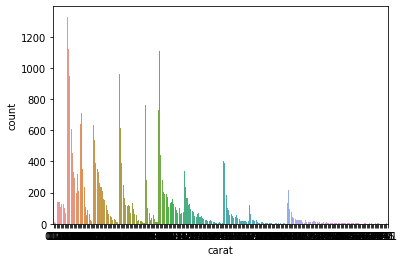

In [35]:
sns.countplot(x='carat',data=df)

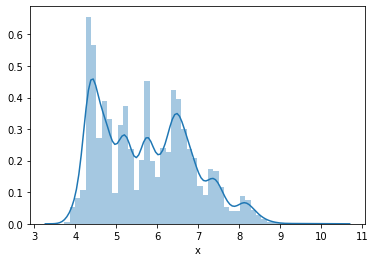

In [36]:
sns.distplot(df['x'])

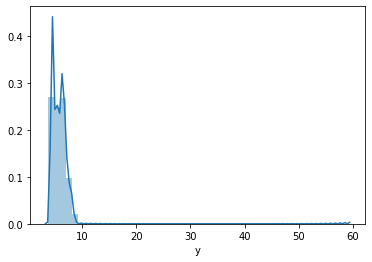

In [37]:
sns.distplot(df['y'])

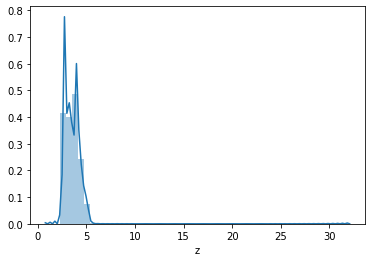

In [38]:
sns.distplot(df['z'])

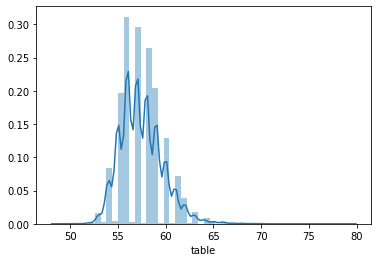

In [39]:
sns.distplot(df['table'])

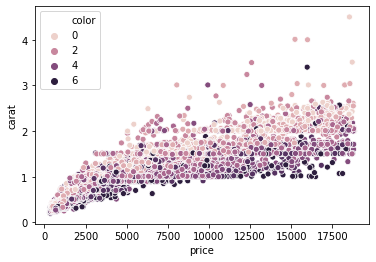

In [40]:
sns.scatterplot(x='price',y='carat',hue='color',data=df)

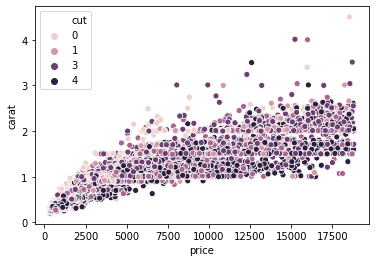

In [41]:
sns.scatterplot(x='price',y='carat',hue='cut',data=df)

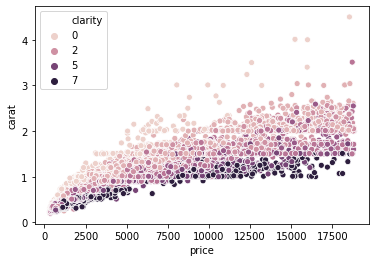

In [42]:
sns.scatterplot(x='price',y='carat',hue='clarity',data=df)

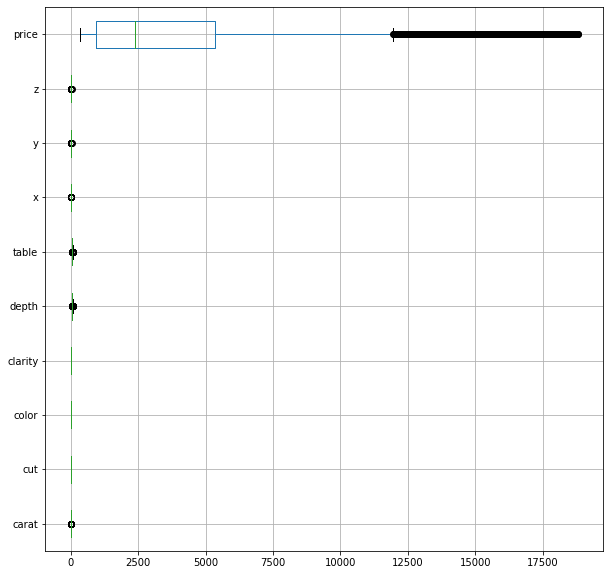

In [43]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)

In [44]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.139908,-0.293760,-0.351660,0.035070,0.181511,0.977908,0.942378,0.946774,0.922400
cut,-0.139908,1.000000,0.026809,0.180317,-0.212275,-0.443049,-0.132945,-0.127480,-0.154347,-0.059806
color,-0.293760,0.026809,1.000000,-0.020887,-0.050326,-0.024074,-0.274167,-0.264320,-0.268931,-0.172710
clarity,-0.351660,0.180317,-0.020887,1.000000,-0.066226,-0.153925,-0.374145,-0.356390,-0.365280,-0.152853
depth,0.035070,-0.212275,-0.050326,-0.066226,1.000000,-0.293363,-0.018208,-0.024217,0.097061,-0.002698
table,0.181511,-0.443049,-0.024074,-0.153925,-0.293363,1.000000,0.197517,0.183545,0.151034,0.126967
x,0.977908,-0.132945,-0.274167,-0.374145,-0.018208,0.197517,1.000000,0.962510,0.961010,0.887467
y,0.942378,-0.127480,-0.264320,-0.356390,-0.024217,0.183545,0.962510,1.000000,0.932974,0.857255
z,0.946774,-0.154347,-0.268931,-0.365280,0.097061,0.151034,0.961010,0.932974,1.000000,0.855775
price,0.922400,-0.059806,-0.172710,-0.152853,-0.002698,0.126967,0.887467,0.857255,0.855775,1.000000


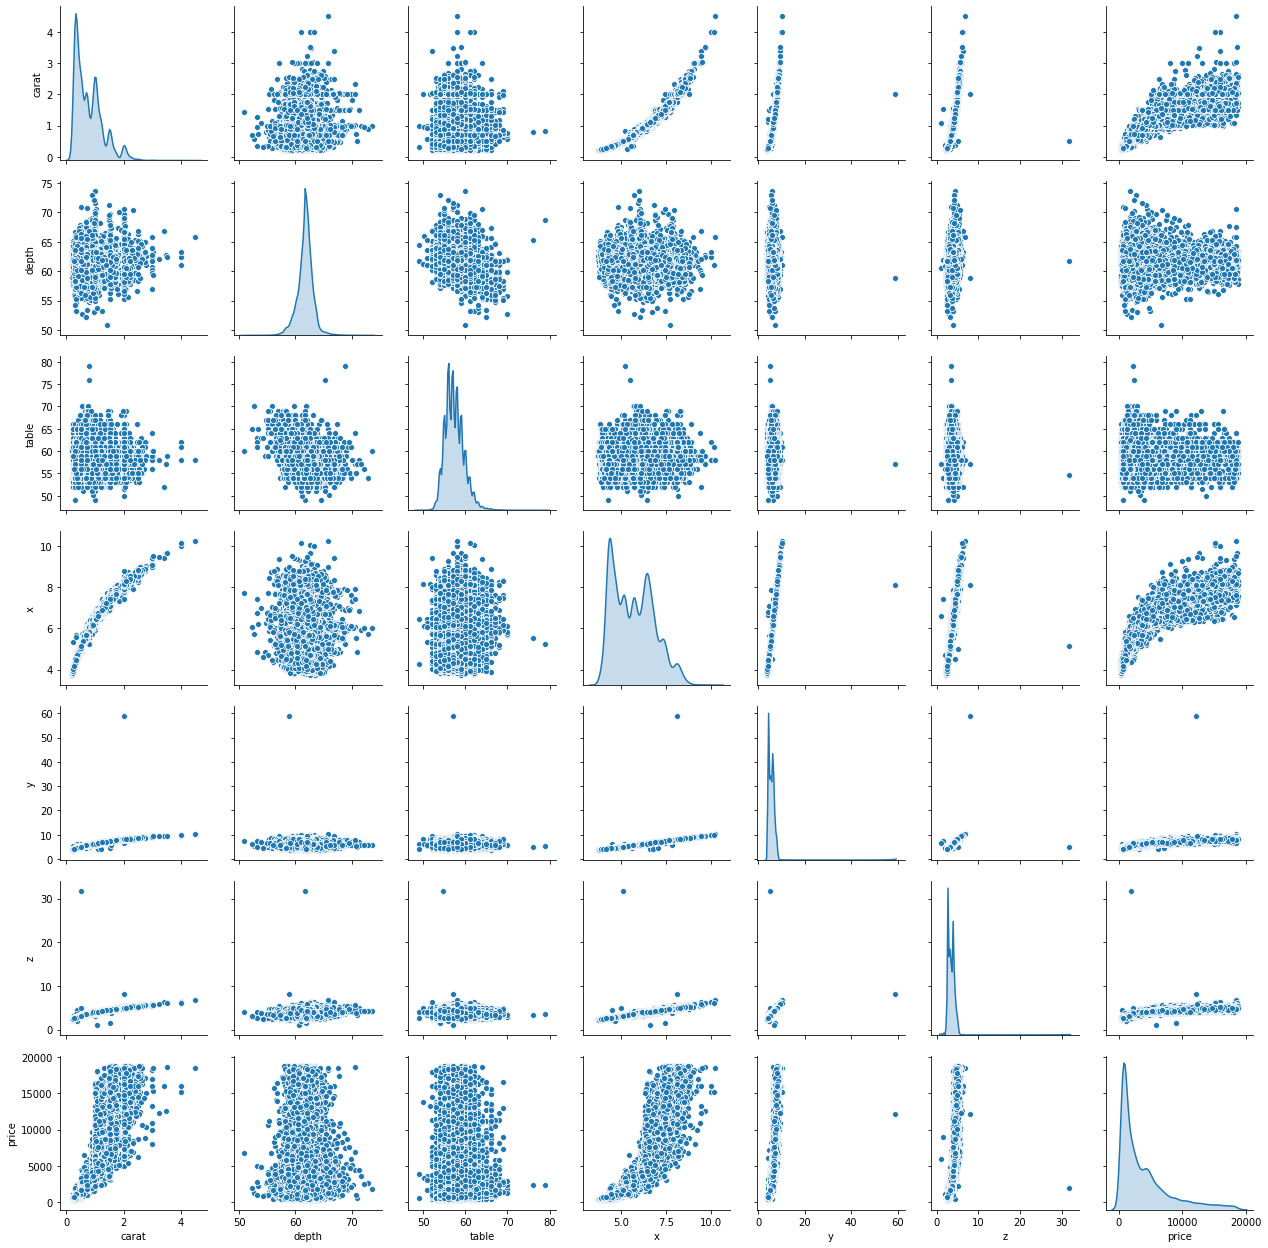

In [45]:
sns.pairplot(df[['carat','depth','table','x','y','z','price']], diag_kind = 'kde')

1. There are mutliple peaks in the attributes 'Cut', 'Color','Clarity' denoting that there can be different clusters/classes in those attributes. We can build a classifying model to segregrate the classed and do multiple linear regression models.

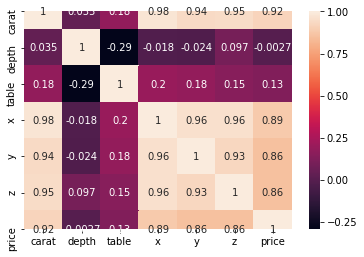

In [46]:
sns.heatmap(df[['carat','depth','table','x','y','z','price']].corr(),annot=True)
plt.show()

#### Highly Correlated variables:

 1. Carat vs x (length of the gem)
 2. Carat vs y (width of the gem)
 3. Carat vs z (height of the gem)
 4. Carat vs price
 5. All dimensions x,y,z are all correlated strongly
 
#### Moderately Correlated variables:

 1. x vs price
 2. y vs price
 3. z vs price
 
#### Very Poorly Correlated variables:
 1. Depth vs Table

1. There is multicollinearity present in the data as the independent variables such as x,y,z & carat are highly related with each other. This correlation is not expected as carat is a measure of weight of the gem where as the length, width and height dimensions denotes the size. They are often used interchangeably but both are different. For suppose, two gems having same dimensions might vary in carats. So, to find a meaning to this relationship, we can assume that the sample of the gems contains similarly densed gems.
2. We can do a Multi-Collinearity test to interpret and to arrive at a decision on further steps.
3. Other than these there are no other variables correlating with each other.

In [47]:
df_before = df
X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index=X1.columns)
print('DATA BEFORE')
print('-'*100)
display(series_before)


C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const      6676.464316
carat        43.197994
cut           1.505607
color         1.323069
clarity       1.641845
depth         1.602281
table         1.596938
x            48.923381
y            13.858656
z            16.074655
price        10.667981
dtype: float64

In [48]:
df_after = df.drop(['x','y','z'],axis=1)
X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])], index=X2.columns)
print('DATA AFTER')
print('-'*100)
display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const      5387.673723
carat        12.568260
cut           1.503833
color         1.310317
clarity       1.636791
depth         1.318026
table         1.592602
price        10.346324
dtype: float64

It is clearly evident that the dimensions x,y,z are responsible for the multicollinearity in the data. We can do PCA to remove them to get better accuracy.

In [49]:
X = df.drop('price', axis=1)
y = df[['price']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [51]:
print("The shape of X_train is ",X_train.shape)
print("The shape of X_test is ",X_test.shape)

The shape of X_train is  (18847, 9)
The shape of X_test is  (8078, 9)


In [52]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
for idx, col_name in enumerate(X_train.columns):
    print('The Coefficient for {} is {}'.format(col_name,reg_model.coef_[0][idx]))

The Coefficient for carat is 11045.930730993428
The Coefficient for cut is 126.99316039504276
The Coefficient for color is 323.6290075408503
The Coefficient for clarity is 431.61524580125274
The Coefficient for depth is -81.11044376164621
The Coefficient for table is -23.026895744256535
The Coefficient for x is -2403.8576451764075
The Coefficient for y is 1466.7808298668829
The Coefficient for z is -73.77104700092346


In [54]:
intercept = reg_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is 4262.318557961078


In [55]:
reg_model.score(X_train, y_train)

0.906545186021606

In [56]:
reg_model.score(X_test, y_test)

0.8645626485524088

In [57]:
X1 = df_after.drop('price', axis=1)
y1 = df_after[['price']]

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.30,random_state=0)

In [59]:
reg1_model = LinearRegression()
reg1_model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
for idx, col_name in enumerate(X1_train.columns):
    print('The Coefficient for {} is {}'.format(col_name,reg1_model.coef_[0][idx]))

The Coefficient for carat is 8778.214785405551
The Coefficient for cut is 120.29457937267694
The Coefficient for color is 319.4696855246937
The Coefficient for clarity is 458.7261208875161
The Coefficient for depth is -50.646104874484834
The Coefficient for table is -29.56357815161539


In [61]:
intercept = reg1_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is -1113.2374821491208


In [62]:
reg1_model.score(X1_train, y1_train)

0.9028751395152875

In [63]:
reg1_model.score(X1_test, y1_test)

0.9042939552621223

In [64]:
#  USing statsmodel

In [65]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()
data_train.shape

(18847, 10)

In [66]:
lm1 = smf.ols(formula = 'price ~ carat+cut+clarity+color+depth+table+x+y+z',data=data_train).fit()
lm1.params

Intercept     4262.318558
carat        11045.930731
cut            126.993160
clarity        431.615246
color          323.629008
depth          -81.110444
table          -23.026896
x            -2403.857645
y             1466.780830
z              -73.771047
dtype: float64

In [67]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 2.030e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:35:47   Log-Likelihood:            -1.6069e+05
No. Observations:               18847   AIC:                         3.214e+05
Df Residuals:                   18837   BIC:                         3.215e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4262.3186    729.485      5.843      0.0

In [68]:
data1_train = pd.concat([X1_train, y1_train], axis=1)
data1_train.head()
data1_train.shape

(18847, 7)

In [69]:
lm2 = smf.ols(formula = 'price ~ carat+cut+clarity+color+depth+table',data=data1_train).fit()
lm2.params

Intercept   -1113.237482
carat        8778.214785
cut           120.294579
clarity       458.726121
color         319.469686
depth         -50.646105
table         -29.563578
dtype: float64

In [70]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.919e+04
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:35:47   Log-Likelihood:            -1.6106e+05
No. Observations:               18847   AIC:                         3.221e+05
Df Residuals:                   18840   BIC:                         3.222e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1113.2375    663.777     -1.677      0.0

In [71]:
mse1 = np.mean((reg_model.predict(X_test)-y_test)**2)
print(math.sqrt(mse1))

1502.6682654719127


In [72]:
mse2 = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
print(math.sqrt(mse2))

1220.8182496571992


In [73]:
np.sqrt(lm1.mse_resid)

1221.142254612521

In [74]:
data_test = pd.concat([X_test,y_test],axis=1)
data_test.shape

(8078, 10)

In [75]:
y_predict = lm1.predict(data_test)

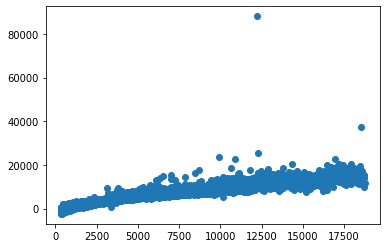

In [76]:
plt.scatter(y_test['price'], y_predict)
plt.show()

In [77]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1113.24) * Intercept + (8778.21) * carat + (120.29) * cut + (458.73) * clarity + (319.47) * color + (-50.65) * depth + (-29.56) * table + 

In [78]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [79]:
reg_model_scaled = LinearRegression()
reg_model_scaled.fit(X_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print('The Coefficient for {} is {}'.format(col_name,reg_model_scaled.coef_[0][idx]))

The Coefficient for carat is 1.3125718084092575
The Coefficient for cut is 0.035603092162851235
The Coefficient for color is 0.13849038426021562
The Coefficient for clarity is 0.1928182778853158
The Coefficient for depth is -0.028480585215926914
The Coefficient for table is -0.012854222528060486
The Coefficient for x is -0.6749388830061362
The Coefficient for y is 0.40883231011793986
The Coefficient for z is -0.013354375288227305


In [81]:
intercept = reg_model_scaled.intercept_[0]
print('The intercept for scaled Model is {}'.format(intercept))

The intercept for scaled Model is 8.953169138484294e-16


In [82]:
reg_model_scaled.score(X_train_scaled,y_train_scaled)

0.9065451860216062

In [83]:
reg_model_scaled.score(X_test_scaled,y_test_scaled)

0.8712095042028474

In [84]:
mse = np.mean((reg_model.predict(X_test)-y_test)**2)
print(math.sqrt(mse))

1502.6682654719127


In [85]:
mse_scaled = np.mean((reg_model_scaled.predict(X_test_scaled)-y_test_scaled)**2)
print(math.sqrt(mse_scaled))

0.3588739274413125


In [86]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [87]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 82.26760088201304
cut ---> 8.9059226296737
color ---> 5.539243128334654
clarity ---> 4.872068486408901
depth ---> 555.9103144967708
table ---> 549.1600585490555
x ---> 1135.1500909775664
y ---> 347.8672911357471
z ---> 386.4563024986848


## Problem-2

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


### Loading the data

In [89]:
data = pd.read_csv('Holiday_Package.csv')

In [90]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


1. Data has been loaded without any issue. Let's check the dimensions of the loaded data to confirm the same.
2. The first column seems to be having serial number which is unnecessary. So we can remove that column

In [91]:
data.shape

(872, 8)

In [92]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
display(data.head())
display('Shape of the data after removing the unwanted column is {}'.format(data.shape))

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


'Shape of the data after removing the unwanted column is (872, 7)'

### Checking the datatypes of the data

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


1. Comparing with the dimensions of the data, it seems there are no missing data.
2. Holliday-Package and Foreign columns are object type data precisely to be boolean. They need to be encoded to apply Logistic regression and LDA models.
3. All the other variables are integer values.

### Descriptive Statistics

In [94]:
data.describe(include ='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [95]:
data.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [96]:
data.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

1. The mean salary of the employees in the sample is around forty-eight thousand with a minimum of thousand three hundered and a maximum of 2 Lakh thirty seven thousand.
2. Mean age of the employees working is 40 years. Minimum age is 20 years and the elder most employee is 62 years old.
3. 50% of the employees are under age 40, so there is a high probability of opting for the Holiday package.
4. The average years of education of employees is around 9 years. The highest qualified employee have 21 years of formal education!!! 
5. Out of 872 employees 471 people havent not opted for the holiday Package which is more than 50% of total employees. 
6. There are 656 Indian employees and 216 Foreigners working in the company.

### Checking for Duplicates

In [97]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Checking for Null Values

In [98]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

As per above there are no null values. But there are values of zero in the columns no_young_children and no_older_children. 

In [99]:
data[data['no_young_children']==data['no_young_children'].min()]


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
4,no,66734,44,12,0,2,no
5,yes,61590,42,12,0,1,no
6,no,94344,51,8,0,0,no
...,...,...,...,...,...,...,...
865,yes,44057,35,9,0,2,yes
866,yes,22643,42,14,0,0,yes
868,yes,32137,48,8,0,0,yes
870,yes,55958,41,10,0,1,yes


In [100]:
data[data['no_older_children']==data['no_older_children'].min()]


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
6,no,94344,51,8,0,0,no
8,no,41140,39,12,0,0,no
11,no,35157,60,12,0,0,no
...,...,...,...,...,...,...,...
864,no,25527,41,5,1,0,yes
866,yes,22643,42,14,0,0,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes


In [101]:
data[(data['no_older_children']==0)& (data['no_young_children']==0)]

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
2,no,58022,46,9,0,0,no
6,no,94344,51,8,0,0,no
8,no,41140,39,12,0,0,no
11,no,35157,60,12,0,0,no
13,no,148221,56,14,0,0,no
...,...,...,...,...,...,...,...
855,yes,106302,47,13,0,0,yes
859,yes,47837,38,11,0,0,yes
866,yes,22643,42,14,0,0,yes
868,yes,32137,48,8,0,0,yes


1. The above outputs show there are 665 rows of zeros in No_young_children column and 393 zeros in no_older_children. But these are not Null values. They signify that 393 employees don't have any older children where 665 employees don't have younger children.
2. There are 271 employees with no younger and older children.

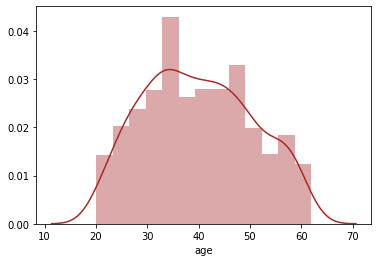

In [102]:
sns.distplot(data["age"], color='brown')

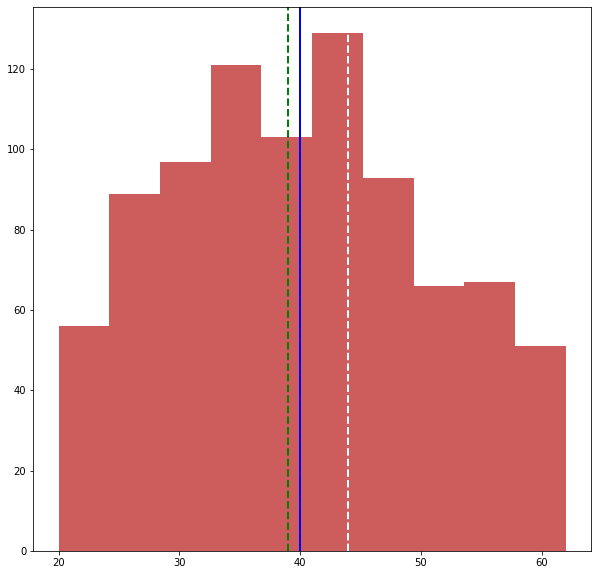

In [103]:
plt.figure(figsize=(10,10)) # makes the plot wider
plt.hist(data['age'], color='indianred') # plots a simple histogram
plt.axvline(data['age'].mean(), color='b', linewidth=2)
plt.axvline(data['age'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(data['age'].mode()[0], color='w', linestyle='dashed', linewidth=2)

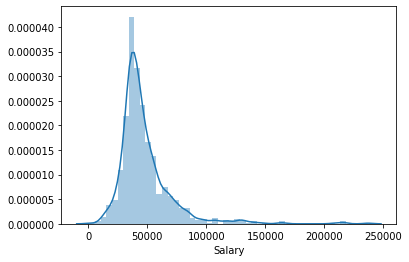

In [104]:
sns.distplot(data["Salary"])

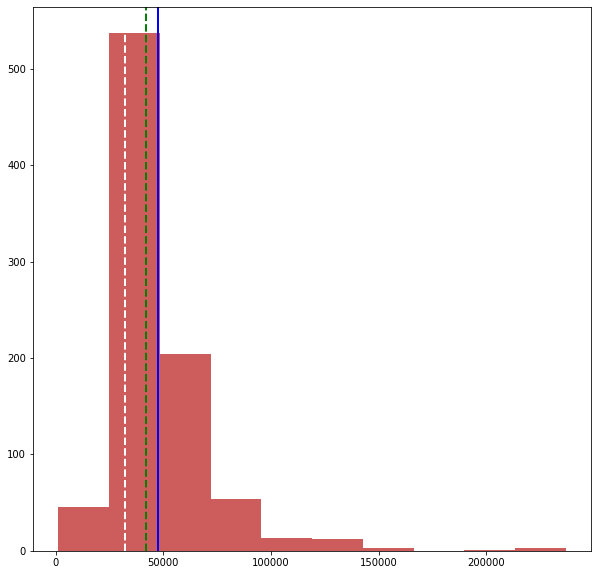

In [105]:
plt.figure(figsize=(10,10)) # makes the plot wider
plt.hist(data['Salary'], color='indianred') # plots a simple histogram
plt.axvline(data['Salary'].mean(), color='b', linewidth=2)
plt.axvline(data['Salary'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(data['Salary'].mode()[0], color='w', linestyle='dashed', linewidth=2)

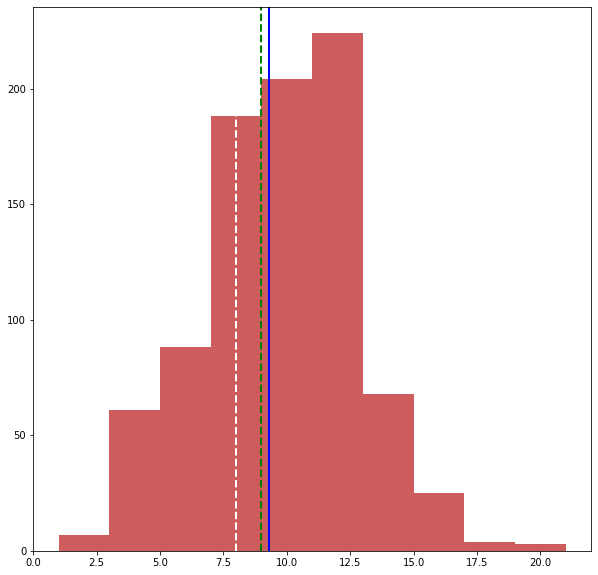

In [106]:
plt.figure(figsize=(10,10)) # makes the plot wider
plt.hist(data['educ'], color='indianred') # plots a simple histogram
plt.axvline(data['educ'].mean(), color='b', linewidth=2)
plt.axvline(data['educ'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(data['educ'].mode()[0], color='w', linestyle='dashed', linewidth=2)

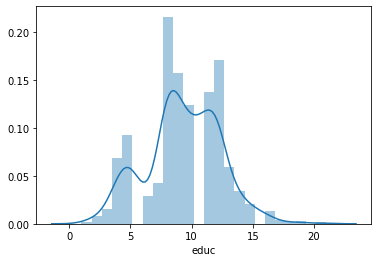

In [107]:
sns.distplot(data["educ"])

## No of younger & Older children Vs Age

In [108]:
pd.crosstab(data['no_young_children'],data['age'] ).T

no_young_children,0,1,2,3
age,,,,
20,3,5,0,0
21,5,6,1,0
22,1,7,1,0
23,5,4,2,0
24,2,9,5,0
25,5,7,5,0
26,6,14,4,0
27,5,12,2,0
28,11,10,6,2


In [109]:
pd.crosstab(data['no_older_children'],data['age'] ).T

no_older_children,0,1,2,3,4,5,6
age,,,,,,,
20,8,0,0,0,0,0,0
21,12,0,0,0,0,0,0
22,9,0,0,0,0,0,0
23,9,2,0,0,0,0,0
24,13,3,0,0,0,0,0
25,13,3,1,0,0,0,0
26,15,4,5,0,0,0,0
27,10,7,2,0,0,0,0
28,12,9,8,0,0,0,0


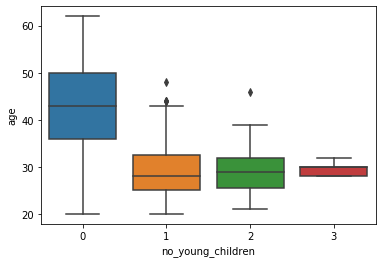

In [110]:
sns.boxplot(x="no_young_children", y="age", data=data)

1. Most of the employees in the age group of 35 to 50 dont have younger children. 
2. Most of the employees of age group 25-35 have 1-3 younger children.

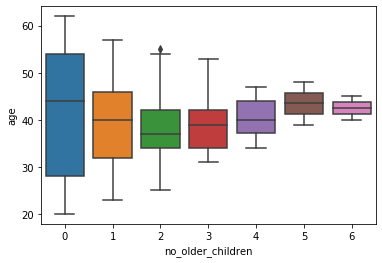

In [111]:
sns.boxplot(x="no_older_children", y="age", data=data)

1. Age group of 28-52 employees don't have older children
2. Most of older children population is distributed amoung the age group of 32-40

## Holiday Package vs Children

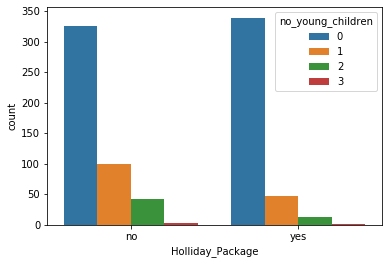

In [112]:
sns.countplot(x="Holliday_Package", hue="no_young_children", data=data)

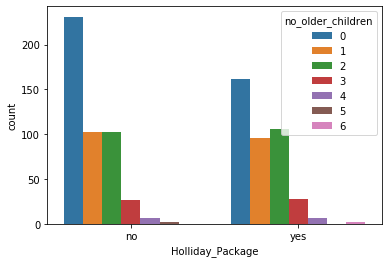

In [113]:
sns.countplot(x="Holliday_Package", hue="no_older_children", data=data)

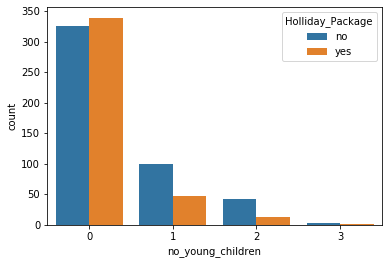

In [114]:
sns.countplot(x="no_young_children", hue="Holliday_Package", data=data)

1. Employees with no young children have equally opted and rejected the holiday package.
2. Employees with more young children are most likely to reject the holiday package. Reason?

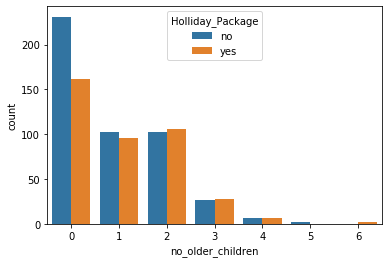

In [115]:
sns.countplot(x="no_older_children", hue="Holliday_Package", data=data)

1. Employees with No older children are more likely to reject the holiday package 
2. Employees with more numbe of elder children are more likely to opt for the holiday package. Reason?

## Age of Employees Vs Holiday Package

In [116]:
pd.crosstab(data['Holliday_Package'],data['age'] ).T

Holliday_Package,no,yes
age,,
20,4,4
21,6,6
22,6,3
23,8,3
24,15,1
25,9,8
26,10,14
27,9,10
28,19,10


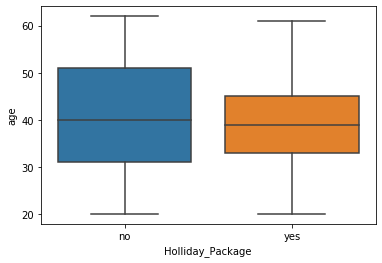

In [117]:
sns.boxplot(x="Holliday_Package", y="age", data=data)

It is difficult to distinguish the distribution here.

## Foreigners vs Holiday Package

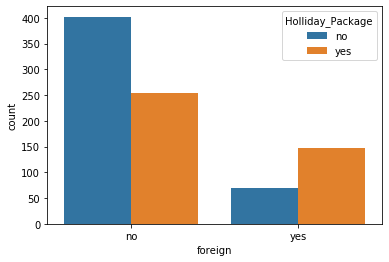

In [118]:
sns.countplot(x="foreign", hue="Holliday_Package", data=data)

In [119]:
pd.crosstab(data['Holliday_Package'],data['foreign'] )

foreign,no,yes
Holliday_Package,,
no,402,69
yes,254,147


1. 70% Foreigners opted for the Holiday package
2. Only 40% of locals opted for Holiday Package while the rest reject.

## Education vs Holiday_Package

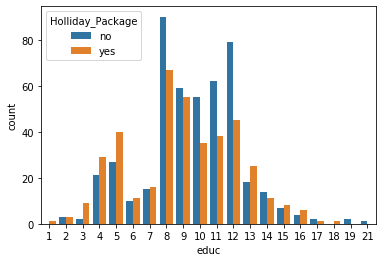

In [120]:
sns.countplot(x="educ", hue="Holliday_Package", data=data)

## Salary vs Holiday Package

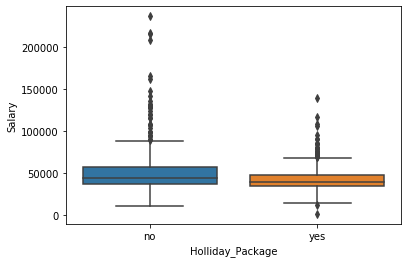

In [121]:
sns.boxplot(x="Holliday_Package", y="Salary", data=data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB87F08348>,
      dtype=object)

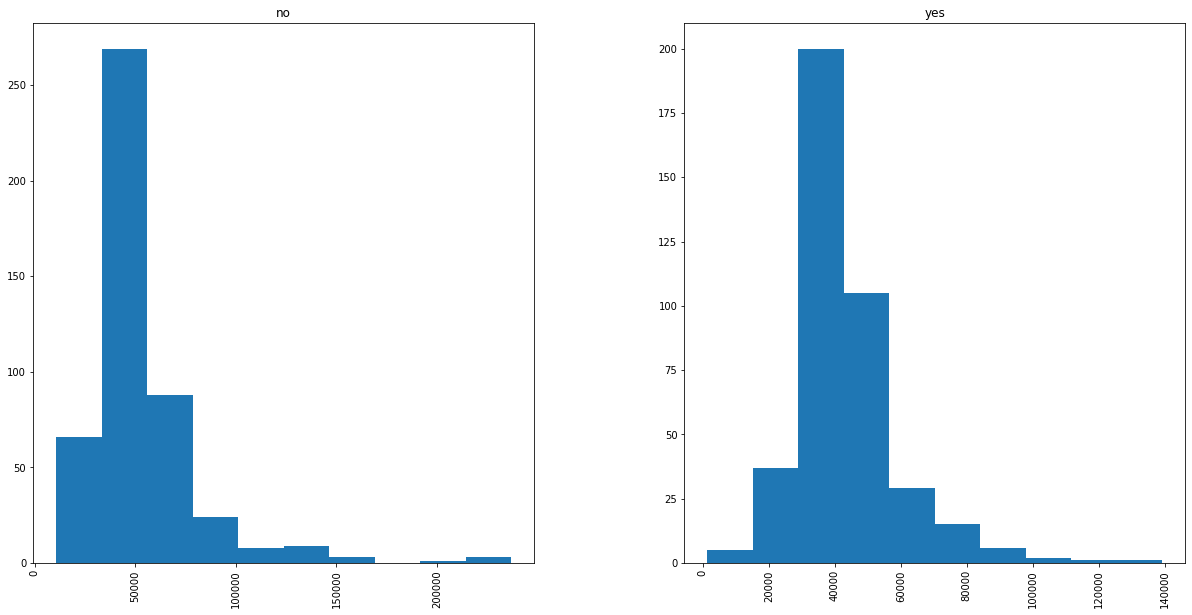

In [122]:
data.hist(by='Holliday_Package',column = 'Salary',figsize=(20,10))

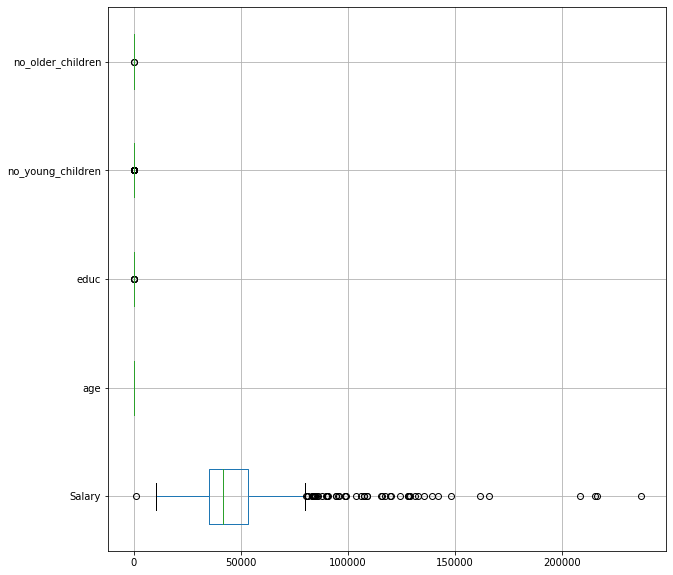

In [123]:
plt.figure(figsize=(10,10))
data.boxplot(vert=0)

## Multivariate Analysis

In [124]:
data.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


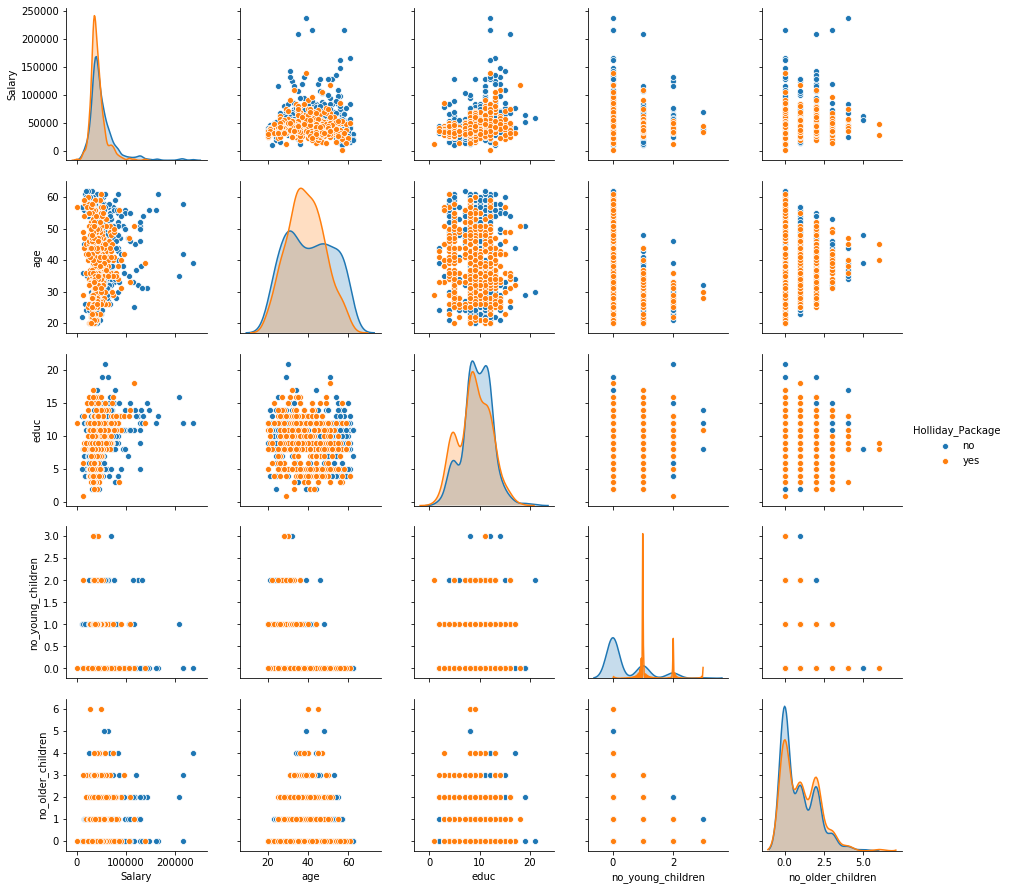

In [125]:
sns.pairplot(data , hue='Holliday_Package' , diag_kind = 'kde')

## Encoding Object Datatypes

In [126]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [127]:
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


## Splitting the data into Training and Testing dataset

In [128]:
X = data.drop('Holliday_Package', axis=1)

 
y = data['Holliday_Package']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

## Fitting Logistic Regression Model

In [130]:
model_log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_log.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   41.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

## Predictions from the model

In [131]:
ytrain_predict = model_log.predict(X_train)
ytest_predict = model_log.predict(X_test)

In [132]:
ytest_predict_prob=model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.760399,0.239601
1,0.273260,0.726740
2,0.902624,0.097376
3,0.978140,0.021860
4,0.513226,0.486774


## Logistic Regression Model Performance Evaluation

In [133]:
model_log.score(X_train, y_train)

0.6786885245901639

In [134]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.743


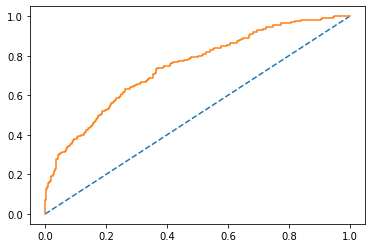

In [135]:
# predict probabilities
probs = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [136]:
model_log.score(X_test, y_test)

0.6374045801526718

AUC: 0.743


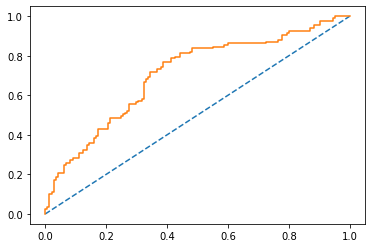

In [137]:
# predict probabilities
probs = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [138]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

In [139]:
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [140]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [141]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



## Fitting Linear Discriminant Analysis Model

In [142]:
clf = LinearDiscriminantAnalysis()
model_LDA=clf.fit(X,y)
model_LDA

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [143]:
pred_class = model_LDA.predict(X)
data['Prediction'] = pred_class 
data.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Prediction
0,0,48412,30,8,1,1,0,0
1,1,37207,45,8,0,1,0,0
2,0,58022,46,9,0,0,0,0
3,0,66503,31,11,2,0,0,0
4,0,66734,44,12,0,2,0,0


## LDA Perfomance Evaluation

In [144]:
confusion_matrix(y, pred_class)

array([[360, 111],
       [183, 218]], dtype=int64)

In [145]:
model_LDA.score(X,y)

0.6628440366972477

In [146]:
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       471
           1       0.66      0.54      0.60       401

    accuracy                           0.66       872
   macro avg       0.66      0.65      0.65       872
weighted avg       0.66      0.66      0.66       872



AUC: 0.732


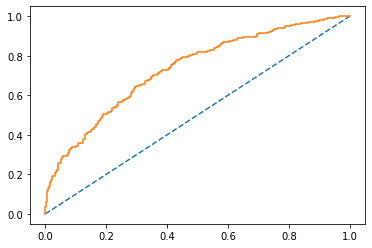

In [147]:
probs = model_LDA.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)

In [148]:
model2_LDA=clf.fit(X_train,y_train)

In [149]:
pred_class_train = model2_LDA.predict(X_train)
pred_class_test = model2_LDA.predict(X_test)

In [150]:
confusion_matrix(y_train, pred_class_train)

array([[252,  74],
       [126, 158]], dtype=int64)

In [151]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [152]:
model2_LDA.score(X_train,y_train)

0.6721311475409836

In [153]:
confusion_matrix(y_test, pred_class_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

In [154]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [155]:
model2_LDA.score(X_test,y_test)

0.6412213740458015

AUC: 0.742


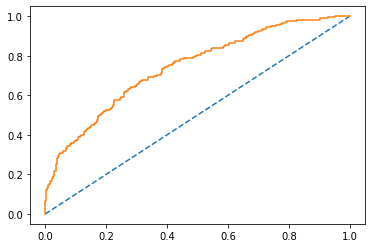

In [156]:
# predict probabilities
probs = model2_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.742


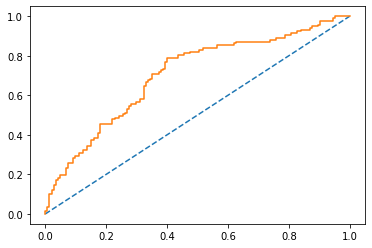

In [157]:
probs = model2_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [158]:
X_scaled = data.drop('Holliday_Package', axis=1)
X_scaled = np.asmatrix(X_scaled)
#Scale X
X_scaled = scale(X)

# Copy target into the y dataframe. 
y = np.asarray(data[['Holliday_Package']])

In [159]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [160]:
model3_LDA=clf.fit(X_scaled_train,y_scaled_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [161]:
pred_class_train_scaled = model3_LDA.predict(X_scaled_train)
pred_class_test_scaled = model3_LDA.predict(X_scaled_test)

In [162]:
confusion_matrix(y_scaled_train, pred_class_train_scaled)

array([[252,  74],
       [126, 158]], dtype=int64)

In [163]:
model3_LDA.score(X_scaled_train,y_scaled_train)

0.6721311475409836

In [164]:
print(classification_report(y_scaled_train, pred_class_train_scaled))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [165]:
confusion_matrix(y_scaled_test, pred_class_test_scaled)

array([[103,  42],
       [ 52,  65]], dtype=int64)

In [166]:
model3_LDA.score(X_scaled_test,y_scaled_test)

0.6412213740458015

In [167]:
print(classification_report(y_scaled_test, pred_class_test_scaled))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262

